In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

In [63]:
X,y=make_blobs(n_samples=1000, centers=3, n_features=2)

In [64]:
X

array([[ -4.54769194, -11.17682622],
       [ -8.85244934,  -8.78029353],
       [ -1.69350101,   0.04667921],
       ...,
       [ -6.02997888,  -9.57512374],
       [ -5.65515636,  -9.87112078],
       [  5.07211136,   5.01025553]])

In [65]:
y

array([2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1,
       1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0,
       1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0,
       2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0,
       1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 2, 0, 1, 0, 2, 1,
       1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0,
       1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2,
       0, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 0, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 2, 0, 0, 2,

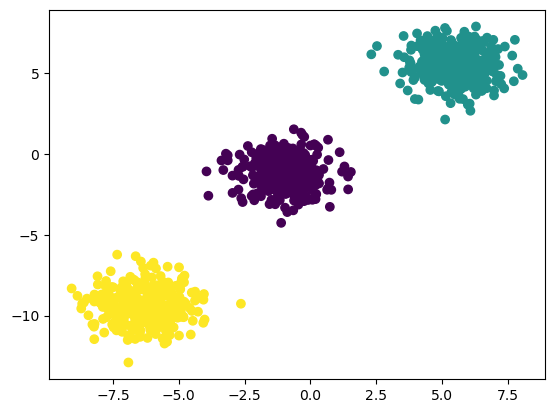

In [66]:
plt.scatter(X[:,0], X[:,1], c=y,)

In [67]:
 ##Standardize the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
X_tarin_Scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.transform(X_test)

In [70]:
from sklearn.cluster import KMeans

In [71]:
## Elbow Method to find optimal number of clusters
import warnings
warnings.filterwarnings("ignore")
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_tarin_Scaled)
    wcss.append(kmeans.inertia_)

In [72]:
wcss

[1340.0000000000002,
 358.12844640199285,
 41.15421521786297,
 35.64998417787557,
 31.626518273942544,
 26.091009335555473,
 23.413029579835168,
 20.545308270026982,
 18.077900777104087,
 16.816734652419136]

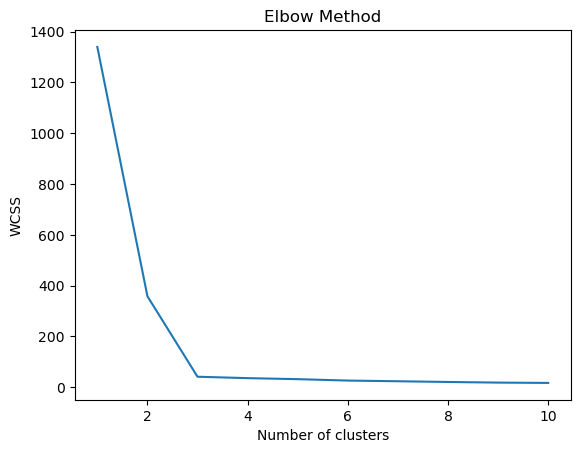

In [73]:
## Plotting the elbow method
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [74]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [75]:
kmeans.fit_predict(X_tarin_Scaled)

array([1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2,
       0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2,
       1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       1, 2, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0,
       2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 0,
       1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1,
       0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0,

In [76]:
y_pred = kmeans.predict(X_test_Scaled)

In [77]:
y_pred

array([1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1,
       2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2,
       2, 0, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0,
       0, 1, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2,
       2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0,
       0, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0,
       2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2, 1,
       2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1,
       0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 1, 2, 1,
       1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1,
       0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1,

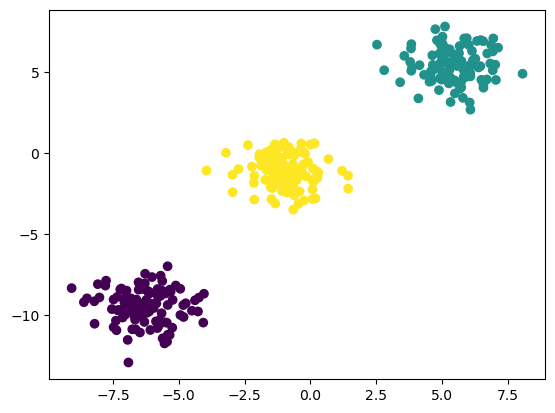

In [78]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

In [79]:
##Validating the k value
##knee_locator
##silhouette_score

In [81]:
##knee_locator
!pip install kneed

In [82]:
from kneed import KneeLocator 

In [83]:
kl=KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')

In [84]:
kl.elbow

3